# 滤波器

给定时间序列：
$$
\{x_t\}_{t=-\infty}^{\infty} = \begin{pmatrix} \ldots,x_{-2},x_{-1},x_0,x_1,x_2,\ldots \end{pmatrix}
$$
一个有限长度的观测到的时间序列向量 $\mathbf{x}$ 可以看做该随机过程的一个实现的片段：

<img src="./images/时间序列观测样本.PNG" />

**滤波器（Filter）**即是将时间序列 $x_t$ 转换为另一个时间序列 $y_t$ 的变换：

<img src="./images/滤波器.PNG" />

**线性滤波器（Linear Filter）**的输出 $y_t$ 是输入序列 $x_t$ 和**滤波器系数（Filter Coefficients）**序列 $w_t$ 的卷积（Convolution）：
$$
y_t = \sum\limits_{i=-\infty}^{\infty} w_ix_{t-i}
$$

**多级滤波（Multistage Filtering）**或者**滤波器级联（Filter Cascade）**

<img src="./images/滤波器级联.PNG" />

一个滤波器的输出作为另一个滤波器的输入将多个滤波器串联起来，对于线性滤波器，假设第一个滤波器系数为 $w_1$，第二个滤波器系数为 $w_2$，则滤波器级联的系数为两个系数的卷积 $w_1 * w_2$

**因果滤波器（Causal Filter）**或者**物理可实现滤波器（Physically Realizable Filter）**：只需要输入序列当前和过去的值，即：
$$
y_t = \sum\limits_{i=0}^{\infty} w_ix_{t-i}
$$

**非时变滤波器（Time Invariant Filter）**：滤波器系数关于时间是常量。

# 时域上的线性滤波器

**单位脉冲信号（Unit Impulse Signal）**：
$$
x_t = \left\{\begin{aligned}
& 1,\textrm{  if }t=0\\
& 0,\textrm{  otherwise} 
\end{aligned}\right.
$$
给定单位脉冲信号作为滤波器的输入，滤波器的输出称为**脉冲响应函数（Impulse Response Function）**。

对于线性滤波器，其脉冲响应函数即为滤波器系数 $w_t$。

在时域上，滤波器根据其脉冲响应可以分为：
* **有限脉冲响应滤波器（Finite Impulse Response Filter, FIR Filter）**：即脉冲响应的非零值是有限个；
* **无限脉冲响应滤波器（Infinite Impulse Response Filter, IIR Filter）**：即脉冲响应的非零值是无限个。

## IIR 滤波器

线性滤波器也可以看做如下常系数线性差分方程的特例：
$$
y_t = \sum\limits_{i=1}^L a_iy_{t-i} + \sum\limits_{i=0}^M w_ix_{t-i}
$$
如果 $L\geq 1$，则该滤波器是一个 IIR 滤波器。

## FIR 滤波器

FIR 滤波器的一般形式：
$$
y_t = \sum\limits_{i=-N}^M w_ix_{t-i}
$$

**中心移动平均线**：
$$
y_t = \frac{1}{M+N+1}\sum\limits_{i=-N}^M x_{t-i}
$$

由 $(0.5+0.5)^{2N}$ 的展开式作为滤波器系数的一类对称的中心化移动平均滤波器，比如 **Hanning Filter**（$N=2$）：
$$
y_t = 0.0625x_{t-2} + 0.25x_{t-1} + 0.375x_t + 0.25x_{t+1} + 0.0625x_{t+2}
$$
当 $N\to\infty$，上述滤波器的脉冲响应的形状趋向于正态分布的形状。

**Hamming Filter**：
$$
y_t = 0.23x_{t-1} + 0.54x_{t} + 0.23x_{t+1}
$$

因果 FIR 滤波器的一般形式：
$$
y_t = \sum\limits_{i=0}^M w_ix_{t-i}
$$

**简单移动平均线**：
$$
y_t = \frac{1}{M+1} \sum\limits_{i=0}^M x_{t-i}
$$

**线性加权移动平均线**：
$$
y_t = \frac{2}{(M+1)(M+2)} \sum\limits_{i=0}^M (M+1-i)x_{t-i}
$$

**指数加权移动平均线（Exponential Weighted Moving Average, EWMA）**：
$$
y_t = \frac{1}{\sum\limits \phi^i}\sum\limits_{i=0}^M \phi^i x_{t-i}
$$

**Almon Lag**：
$$
y_t = \frac{1}{\sum\limits w'_i}\sum\limits_{i=0}^M w'_i x_{t-i}
$$
其中
$$
w'_i = \phi_0 + \phi_1 i - \phi_2 i^2,\ 0<\phi_0,\phi_1,\phi_2\geq1,\ i=0,1,\ldots,M
$$

# 频域上的线性滤波器

考虑正弦信号 $x_t = \sin(a+2\pi ft)$，其中 $f$ 为信号的**频率（Frequency）**，表示单位时间内完整周期的个数；$p=\frac{1}{f}$ 为信号的**周期（Period）**，$\omega=2\pi f$ 称为**角频率（Angular Frequency）**。

在离散时间情形下，频率 $f=1/2$ 或者角频率 $\omega=\pi$ 称为 **Nyquist 频率**，这是信号可能的最高频率，或者说信号可能的最短的周期必须是采样间隔的 2 倍。如果采样间隔大于连续信号周期的一半，比如采样间隔等于信号周期，则采样后的离散信号将是常数，从而无法得知信号的周期信息。

信号的 **Fourier 变换**：
$$
X(f) = \sum\limits_{t=-\infty}^{\infty} x_t e^{-i2\pi ft}
$$
也称为 **Analysis Equation**；

**Fourier 逆变换**为：
$$
x_t = \frac{1}{2\pi}\int_{-\pi}^{\pi} X(f)e^{i2\pi ft}\mathrm{d}f
$$
也称为 **Synthesis Equation**

在时域上，脉冲响应函数是描述和划分滤波器的有用工具；在频域上的工具为**频率响应函数（Frequency Response Function）** 或称为 **Transfer Function**：
$$
H(f) = \sum\limits_{k=-\infty}^{\infty} w_k e^{-i2\pi fk}
$$
其中，$w_k$ 为滤波器的脉冲响应函数，即频率响应函数是脉冲响应函数的 Fourier 变换。

考虑给定频率 $f$ 的简谐信号 $x_t = e^{i2\pi ft}$，对于线性滤波器 $y_t=\sum\limits_{k=-\infty}^{\infty}w_k x_{t-k}$，其输出信号为：
$$
\begin{aligned}
y_t &= \sum\limits_{k=-\infty}^{\infty} w_k e^{i2\pi f(t-k)}\\
&= \left(\sum\limits_{k=-\infty}^{\infty} w_k e^{-i2\pi fk}\right) e^{i2\pi ft}\\
&= H(f)e^{i2\pi ft}
\end{aligned}
$$
即线性滤波器对于简谐信号的作用等于其频率响应函数乘以原信号。如果将频率响应函数写成极坐标表达式：
$$
H(f) = G(f)e^{i\theta(f)}
$$
则第一部分 $G(f)=\left|H(f)\right|$ 称为**增益函数（Gain Function）**，其函数图像称为**增益图像（Gain Diagram）**，后一部分称为**相位函数（Phase Function）**，如果滤波器的相位不为 0，那么滤波器会对原始序列的相位产生改变，这被称为**相位偏移（Phase Shift）**。

根据滤波器的增益函数可以将滤波器分为：
* **低通滤波器（Low-Pass Filter）**：即增益函数值在低频区域较大，高频区域较小；
* **高通滤波器（High-Pass Filter）**：即增益函数值在低频区域较小，高频区域较大；

**理想滤波器（Ideal Filter）**：对于给定的频段 $[f_l,f_u]$，其频率响应函数为
$$
H(f) = \left\{\begin{aligned}
& 1,\ f_l \leq f \leq f_u\\
& 0,\ otherwise
\end{aligned}\right.
$$
对于理想的低通滤波器有 $f_l=0,f_u<1/2$，理想的高通滤波器 $f_l>0,f_u=1/2$。理想滤波器在计算上无法实现，因为其有无限多个系数。实际中使用的滤波器是有限的，其作为理想滤波器某种程度的近似。

# HP 滤波器（Hodrick-Prescott Filter）

HP 滤波器被广泛用于确定宏观时间序列的经济周期成分，其将一个序列 $y_t$ 分解为周期部分 $y_t^c$ 和趋势部分 $y_t^s$：
$$
\min_{y_t^s} \sum\limits_{t=1}^N (y_t - y_t^s)^2 + \lambda\sum\limits_{t=1}^N \left[(y_t+1^s - y^s_t) - (y_t^s - y^s_{t-1})\right]^2
$$
其中，$\lambda$ 是用于惩罚趋势项波动性的系数，值越大得到的趋势项越平滑；$\lambda\to\infty$ 得到线性时间趋势，$\lambda=0$ 则 $y^s_t = y_t$。通常对于季度数据，$\lambda = 1600$，对于年度数据，$\lambda=6.25=1600/4^4$，对于月度数据，$\lambda=129600=1600\times 3^4$
经济周期部分为：$y_t^c = y_t - y^s_t$。

趋势部分可以写作：
$$
y^s_t = \frac{\theta_1\theta_2}{\lambda}\left[ \sum\limits_{j=0}^\infty \left(A_1\theta_1^j + A_2\theta_2^j\right)y_{t-j} + \sum\limits_{j=0}^\infty \left(A_1\theta_1^j + A_2\theta_2^j\right)y_{t+j} \right]
$$
其中，$\theta_1=\bar{\theta}_2$ 互为复共轭，$A_1,A_2$ 是 $\theta_1,\theta_2$ 的函数。从而 HP 滤波器是无穷阶的中心移动平均线。HP 滤波器没有相位偏移。

$y^c_t$ 对应的滤波器频率响应函数为：
$$
H(f,\lambda) = \frac{4\lambda[1 - \cos(2\pi f)]^2}{1 + 4\lambda[1 - \cos(2\pi f)]^2}
$$
对于季度数据（$\lambda=1600$），该函数大概在 $f=0.025$ 处作为低频和高频的分界点，对应的周期大概为 10 年（40 个季度）。

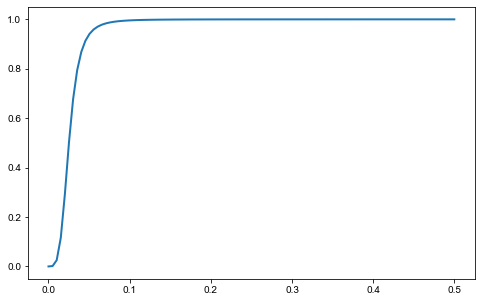

In [4]:
# HP 滤波器的频率响应函数
import numpy as np
coef_lambda = 1600
f = np.linspace(0,0.5,100)
H = 4 * coef_lambda * (1 - np.cos(2*np.pi*f))**2 / (1 + 4 * coef_lambda * (1 - np.cos(2*np.pi*f))**2)

import matplotlib.pyplot as plt
Fig,Axes = plt.subplots(1,1,figsize=(8,5))
Axes.plot(f, H, linewidth=2);
# Axes.plot([0.025,0.025], Axes.yl)

# Wiener 滤波器

**观测方程（Observation Equation）**
$$
y_t = x_t + \varepsilon_t
$$

假设已知 $x_t$ 的自相关函数以及 $x_t$ 和 $y_t$ 的交叉相关函数

# Kalman 滤波器

## 标量情形

**系统方程（System Equation）**:
$$
x_t = \phi x_{t-1} + \nu_t,\ \nu_t \sim \mathcal{N}(0,\sigma_{\nu}^2)
$$
其中，信号噪声 $\nu_t$ 无序列自相关。

**观测方程（Observation Equation）**:
$$
y_t = \gamma x_t + \varepsilon_t,\ \varepsilon_t \sim \mathcal{N}(0, \sigma_\varepsilon^2)
$$
其中，观测误差 $\varepsilon_t$ 无序列自相关。

进一步假设观测误差和信号噪声不相关：
$$
\mathbb{E}[\nu_{t-i}\varepsilon_{t-j}] = 0,\ \forall i,j
$$

递归估计量（Recursive Estimator）的一般形式为：
$$
\hat{x}_N = \alpha_N \hat{x}_{N-1} + \beta_N y_N
$$
即最新估计是上期估计和最新观测的线性组合，记估计量的**均方误差 MSE (Mean Square Error）** 为：
$$
P_N^e = \mathbb{E}[e^2_N] = \mathbb{E}\left(x_N - \hat{x}_N\right)^2
$$
系数 $\alpha_N,\beta_N$ 通过最小化 MSE 得到：
$$
\min_{\alpha_N,\beta_N} P_N^e = \min_{\alpha_N,\beta_N} \mathbb{E}(e_N^2) = \min_{\alpha_N,\beta_N} \mathbb{E}\left(x_N - \alpha_N\hat{x}_{N-1} - \beta_N y_N\right)^2
$$
求导:
$$
\begin{aligned}
\frac{\partial P^e_N}{\partial \alpha_N} &= -2\mathbb{E}\left(x_N - \alpha_N\hat{x}_{N-1} - \beta_N y_N\right)\hat{x}_{N-1} = 0\\
\frac{\partial P^e_N}{\partial \beta_N} &= -2\mathbb{E}\left(x_N - \alpha_N\hat{x}_{N-1} - \beta_N y_N\right)y_N = 0
\end{aligned}
$$
上述条件等价于**正交性条件（Orthogonality Condition）**:
$$
\begin{aligned}
\mathbb{E}[e_N\hat{x}_{N-1}] &= 0\\
\mathbb{E}[e_N y_N] &= 0\\
\end{aligned}
$$
即最优估计下，误差项 $e_N$ 和上期估计 $\hat{x}_{N-1}$ 以及最新观测 $y_N$ 不相关。

求解可得：
$$
\begin{aligned}
\alpha_N &= \phi(1 - \gamma\beta_N)\\
\beta_N &= \frac{\gamma(\phi^2P_{N-1}^e + \sigma^2_{\nu})}{\gamma^2(\phi^2P_{N-1}^e + \sigma^2_{\nu})+\sigma^2_\varepsilon} = \frac{\gamma s_N}{\gamma^2s_N+\sigma_\varepsilon^2}\\
P_N^e &= (1 - \beta_N)s_N
\end{aligned}
$$
其中，$s_N = \phi^2P_{N-1}^e + \sigma^2_{\nu}$ 表示在得到观测 $y_N$ 之前对信号 $x_N$ 预测的方差。

从而最终的 Kalman 滤波为：
$$
\hat{x}_N = \phi \hat{x}_{N-1} + \beta_N\left(y_N - \phi\gamma\hat{x}_{N-1}\right)
$$
其中，$\phi \hat{x}_{N-1}$ 是在得到观测 $y_N$ 之前对 $x_N$ 的最优估计，从而右边第二项代表得到最新观测后对先验估计的修正，$y_N - \phi\gamma\hat{x}_{N-1}$ 为估计 $y_N$ 的误差项，也称为**新息（Innovation）**。新息前面的系数称为 **Kalman 增益（Kalman Gain）**，该估计的 Kalman 增益为 $\beta_N$。

给定 N 时刻的信息，Kalman 滤波可用于计算信号向前 s 期的预测。向前一步递归预测量的形式为：
$$
\hat{x}_{N+1} = a_N\hat{x}_{N} + k_N y_N
$$
最优预测通过最小化**均方预测误差 MSPE（Mean Spuare Prediction Error）** 获得:
$$
P_{N+1}^p = \mathbb{E}\left(x_{N+1} - \hat{x}_{N+1}\right)^2
$$
向前一步预测为：
$$
\hat{x}_{N+1} = \phi\hat{x}_{N} + \phi\beta_N\left(y_N - \gamma\hat{x}_N\right)
$$
此时，Kalman 增益为 $k_N = \phi\beta_N$。

均方预测误差 MPSE 为：
$$
P_{N+1}^p = \left(\phi - \gamma k_N\right)\phi p_N^p + \sigma_\nu^2
$$

## 向量情形

观测方程:
$$
\mathbf{y}_t = \mathbf{C}\mathbf{x}_t+\boldsymbol{\varepsilon}_t
$$
其中：
* $\mathbf{y}_t$: $n\times1$ 观测向量；
* $\mathbf{x}_t$: $k\times1$ 信号向量；
* $\mathbf{C}$: $n\times k$ **观测矩阵（Observation Matrix）**；
* $\boldsymbol{\varepsilon}$: $n\times1$ 观测噪声向量满足:
$$
\mathbb{E}[\boldsymbol{\varepsilon}] = \mathbf{0},\ \mathbb{E}[\boldsymbol{\varepsilon}\boldsymbol{\varepsilon}'] = \mathbf{R}_t
$$

系统方程:
$$
\mathbf{x}_t = \mathbf{A}\mathbf{x}_{t-1}+\boldsymbol{\nu}_t
$$
其中：
* $\mathbf{A}$: $k\times k$ **系统矩阵（System Matrix）**；
* $\boldsymbol{\nu}$: $k\times1$ 系统噪声向量满足:
$$
\mathbb{E}[\boldsymbol{\nu}] = \mathbf{0},\ \mathbb{E}[\boldsymbol{\nu}\boldsymbol{\nu}'] = \mathbf{Q}_t
$$
上述形式称为**状态空间模型（State-Space Model）** 的表示。

同标量情形一样，最优估计通过最小化误差的平均协方差阵来得到：
$$
\mathbf{P}_N^e = \mathbb{E}[\mathbf{e}\mathbf{e}']
$$
N 时刻信号的估计量为：
$$
\hat{\mathbf{x}}_N = \mathbf{A}\hat{\mathbf{x}}_{N-1} + \mathbf{K}_N\left[\mathbf{y}_N - \mathbf{C}\mathbf{A}\hat{\mathbf{x}}_{N-1}\right]
$$
其中，$\mathbf{K}_N$ 为 $n\times n$ Kalman 增益矩阵:
$$
\mathbf{K}_N = \mathbf{S}_N\mathbf{C}'\left[\mathbf{C}\mathbf{S}_N\mathbf{C}'+\mathbf{R}_N\right]^{-1}
$$
$\mathbf{S}_N$ 为误差的协方差矩阵:
$$
\mathbf{S}_N = \mathbf{A}\mathbf{P}^e_{N-1}\mathbf{A}' + \mathbf{Q}_N
$$
误差的平均协方差阵为：
$$
\mathbf{P}_N^e = \mathbf{S}_N - \mathbf{K}_N\mathbf{C}\mathbf{S}_N
$$

# 参考文献

[<a id="cit-Gencay:2002" href="#call-Gencay:2002">Gencay:2002</a>] Ramazan Gencay, Faruk Selcuk, Brandon Whitcher, An Introduction to Wavelets and Other Filtering Methods in Finance and Economics, Academic Press, 2002.